<a href="https://colab.research.google.com/github/zohorasalma/Part_Timers/blob/master/Assignment3_170104150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(style="seaborn")
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset 1.csv',encoding="ISO-8859-1")

In [45]:
dataset

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [46]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [47]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [48]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [49]:
dataset["message"] = dataset.message.map(lambda x: remove_URL(x))
dataset["message"] = dataset.message.map(lambda x: remove_html(x))
dataset["message"] = dataset.message.map(lambda x: remove_emoji(x))
dataset["message"] = dataset.message.map(lambda x: remove_punct(x))

In [50]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
dataset["message"] = dataset["message"].map(remove_stopwords)

In [52]:
dataset.message

0                       real good moment missssssssss much
1                                            reading manga
2                                             comeagainjen
3        lapcat need send em accountant tomorrow oddly ...
4                        add myspace myspacecomlookthunder
                               ...                        
10309    depression g herbo mood im done stressing peop...
10310    depression succumbs brain makes feel like youl...
10311    ketamine nasal spray shows promise depression ...
10312          dont mistake bad day depression everyone em
10313                                                    0
Name: message, Length: 10314, dtype: object

In [53]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [54]:
text = dataset.message

counter = counter_word(text)

In [55]:
len(counter)

22304

In [56]:
num_words = len(counter)

# Max number of words in a sequence
max_length = 20

In [57]:
train_size = int(dataset.shape[0] * 0.8)

train_sentences = dataset.message[:train_size]
train_labels = dataset.label[:train_size]

test_sentences = dataset.message[train_size:]
test_labels = dataset.label[train_size:]

In [58]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

In [59]:
word_index = tokenizer.word_index

In [60]:
word_index

{'im': 1,
 'good': 2,
 'day': 3,
 'love': 4,
 'get': 5,
 'lol': 6,
 'like': 7,
 'thanks': 8,
 'time': 9,
 'today': 10,
 'going': 11,
 'u': 12,
 'know': 13,
 'go': 14,
 'got': 15,
 'new': 16,
 'see': 17,
 'dont': 18,
 'one': 19,
 'great': 20,
 'depression': 21,
 'back': 22,
 'well': 23,
 'night': 24,
 'haha': 25,
 'happy': 26,
 'amp': 27,
 'think': 28,
 'morning': 29,
 'work': 30,
 'twitter': 31,
 'cant': 32,
 'hope': 33,
 'much': 34,
 'really': 35,
 'ill': 36,
 '2': 37,
 'thank': 38,
 'fun': 39,
 'oh': 40,
 'hey': 41,
 'thats': 42,
 'youre': 43,
 'last': 44,
 'nice': 45,
 'watching': 46,
 'tomorrow': 47,
 'home': 48,
 'better': 49,
 'would': 50,
 'need': 51,
 'still': 52,
 'awesome': 53,
 'want': 54,
 'make': 55,
 'everyone': 56,
 'wait': 57,
 'right': 58,
 'way': 59,
 'come': 60,
 'best': 61,
 'gonna': 62,
 'yeah': 63,
 'bed': 64,
 'yes': 65,
 'first': 66,
 'getting': 67,
 'cool': 68,
 'guys': 69,
 'feel': 70,
 'made': 71,
 'ive': 72,
 'people': 73,
 'amazing': 74,
 'tonight': 75,
 'p

In [61]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [62]:
train_sequences[0]

[178, 2, 497, 4769, 34]

In [63]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [64]:
train_padded[0]

array([ 178,    2,  497, 4769,   34,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [65]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [66]:
print(dataset.message[0])
print(train_sequences[0])

real good moment missssssssss much
[178, 2, 497, 4769, 34]


In [67]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [68]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [69]:
decode(train_sequences[0])

'real good moment missssssssss much'

In [70]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (8251, 20)
Shape of test (2063, 20)


In [71]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

model = Sequential()
model.add(layers.Embedding(num_words, 128))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2854912   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 512)         788480    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 1024)        4198400   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         557568    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 16)                8768      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 8,408,145
Trainable params: 8,408,145
Non-trainable params: 0
____________________________________________

In [72]:
history = model.fit(
    train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels),
)

Epoch 1/10
258/258 [==============================] - 36s 86ms/step - loss: 0.1418 - accuracy: 0.9680 - val_loss: 3.6586 - val_accuracy: 0.0000e+00
Epoch 2/10
258/258 [==============================] - 18s 70ms/step - loss: 0.1366 - accuracy: 0.9696 - val_loss: 3.4486 - val_accuracy: 0.0000e+00
Epoch 3/10
258/258 [==============================] - 18s 69ms/step - loss: 0.1289 - accuracy: 0.9710 - val_loss: 3.4369 - val_accuracy: 0.0882
Epoch 4/10
258/258 [==============================] - 18s 69ms/step - loss: 0.1743 - accuracy: 0.9469 - val_loss: 2.2412 - val_accuracy: 0.0000e+00
Epoch 5/10
258/258 [==============================] - 18s 69ms/step - loss: 0.0969 - accuracy: 0.9685 - val_loss: 2.3428 - val_accuracy: 0.0000e+00
Epoch 6/10
258/258 [==============================] - 18s 69ms/step - loss: 0.0776 - accuracy: 0.9724 - val_loss: 2.2180 - val_accuracy: 0.6108
Epoch 7/10
258/258 [==============================] - 18s 69ms/step - loss: 0.0697 - accuracy: 0.9804 - val_loss: 4.3320

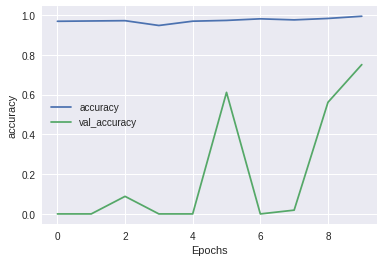

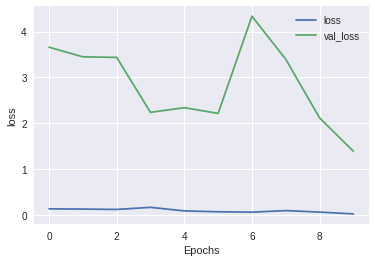


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.968004 	   0.141797 	   0.000000 	   3.658623
       2   0.969579 	   0.136604 	   0.000000 	   3.448633
       3   0.971034 	   0.128872 	   0.088221 	   3.436880
       4   0.946916 	   0.174254 	   0.000000 	   2.241236
       5   0.968489 	   0.096876 	   0.000000 	   2.342777
       6   0.972367 	   0.077617 	   0.610761 	   2.217971
       7   0.980366 	   0.069687 	   0.000000 	   4.332014
       8   0.975033 	   0.103299 	   0.018905 	   3.395738
       9   0.982305 	   0.070827 	   0.560834 	   2.120031
      10   0.993334 	   0.031294 	   0.750364 	   1.393600


In [73]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(10):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

258/258 [==============================] - 9s 37ms/step - loss: 0.0195 - accuracy: 0.9968
Train Loss: 0.01949755847454071
Train Accuracy: 0.9968488812446594 (Model Metric)
Train Accuracy: 0.9968488668040237 (sklearn Metric)
Train Precision: 0.9787234042553191
Train Recall: 0.9163346613545816
Train F1-score: 0.9465020576131687


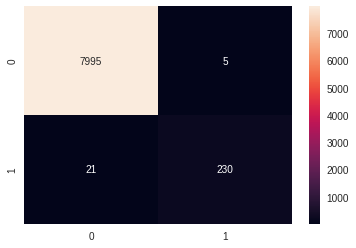

In [74]:
y_pred = model.predict(train_padded)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_padded, train_labels, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(train_labels, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(train_labels, y_pred))
print('Train Recall:', recall_score(train_labels, y_pred))
print('Train F1-score:', f1_score(train_labels, y_pred))

sns.heatmap(confusion_matrix(train_labels, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 2s 25ms/step - loss: 1.3936 - accuracy: 0.7504
Test Loss: 1.393599510192871
Test Accuracy: 0.7503635287284851 (Model Metric)
Test Accuracy: 0.7503635482307319 (sklearn Metric)
Test Precision: 1.0
Test Recall: 0.7503635482307319
Test F1-score: 0.8573802270839103


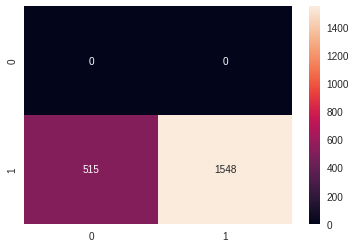

In [75]:
y_pred = model.predict(test_padded)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_padded, test_labels, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(test_labels, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(test_labels, y_pred))
print('Test Recall:', recall_score(test_labels, y_pred))
print('Test F1-score:', f1_score(test_labels, y_pred))

sns.heatmap(confusion_matrix(test_labels, y_pred), annot = True, fmt = 'g')